In [ ]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt


dados = {
   'Pman':[0.03, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45],
   'Volume': [15, 14, 13, 12.5, 11.1, 10.8, 9.9, 8.9, 8.5],
   '1/V': [1/15, 1/14, 1/13, 1/12.5, 1/11.1, 1/10.8, 1/9.9, 1/8.9, 1/8.5],
   'Ptot*V':[1.258676687, 1.270902908, 1.243889129, 1.257359739, 1.170980949, 1.192306815, 1.141507414, 1.069858134, 1.063467123]
}

df = pd.DataFrame(dados)

In [ ]:
#Instrumentos e dados

delta_Pman = 0.05
delta_V = 0.05
T = 302.12
delta_T = 0.5
n = 469.5 * 10**(-6)
r = 8.2 * 10**(-2)
M = 28.97
rho = 1.225

In [ ]:
# Cálculo da pressão atmosférica

Pman_media = df['Pman'].mean()
V_media = df['Volume'].mean() * 10**(-3)
Patm = ((n*r*T)/V_media )- Pman_media
delta_Patm = abs(Patm)*abs(delta_V/(V_media*10**(3)))
print(Patm)
print(delta_Patm)

0.7616905049608912
0.003305310773697213


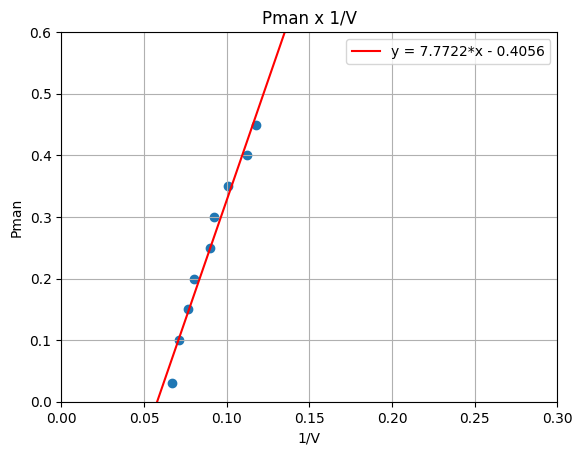

In [ ]:
#função linear da pressão manométrica do tipo y = ax + b
plt.scatter(df['1/V'],
            df['Pman'],
)

plt.title("Pman x 1/V")
plt.xlabel("1/V")
plt.ylabel("Pman")

def f(x: float) -> float:
  return 7.7722*x - 0.4506

x1 = np.arange(0,
               1,
               0.001)

plt.plot(x1, f(x1),
         'r',
         label = 'y = 7.7722*x - 0.4056')

plt.ylim(0,
         0.6)

plt.xlim(0,
         0.3)

plt.grid()
plt.legend(loc = 'upper right')
plt.show()

<Axes: >

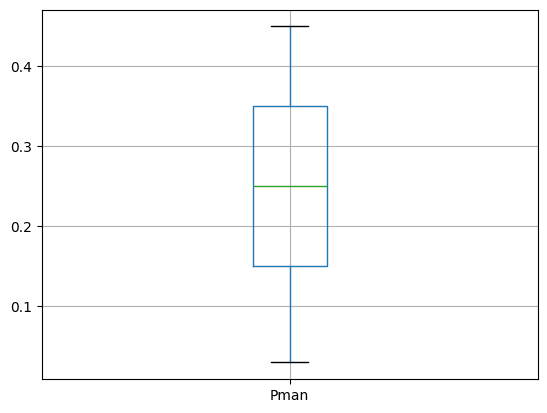

In [ ]:
df.boxplot(column = 'Pman')

In [ ]:
import statsmodels.api as sm
y = df['Pman']
x = df['1/V']

x = sm.add_constant(x)
model = sm.OLS(y, x).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Pman   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     258.7
Date:                Sun, 23 Feb 2025   Prob (F-statistic):           8.73e-07
Time:                        17:34:44   Log-Likelihood:                 21.774
No. Observations:                   9   AIC:                            -39.55
Df Residuals:                       7   BIC:                            -39.15
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4506      0.044    -10.200      0.0

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
import statsmodels.api as sm
y = df['Ptot*V']
x = df['Volume']

x = sm.add_constant(x)
model = sm.OLS(y, x).fit()

print(model.summary())

#y = 0.0336x + 0.7985

                            OLS Regression Results                            
Dep. Variable:                 Ptot*V   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     55.76
Date:                Sun, 23 Feb 2025   Prob (F-statistic):           0.000141
Time:                        19:24:08   Log-Likelihood:                 20.320
No. Observations:                   9   AIC:                            -36.64
Df Residuals:                       7   BIC:                            -36.24
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7985      0.053     15.154      0.0

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  res = hypotest_fun_out(*samples, **kwds)


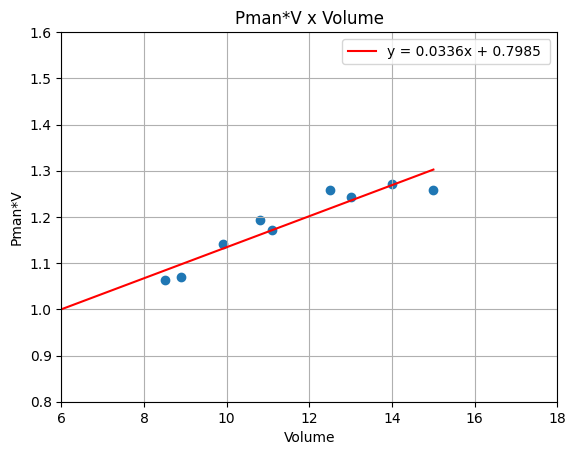

In [ ]:
plt.scatter(df['Volume'],
            df['Ptot*V'],
)

def f1(x: float) -> float:
  return 0.0336*x + 0.7985

x1 = np.arange(0, 20, 5)

plt.plot(x1,
         f1(x1),
         'r',
         label = 'y = 0.0336x + 0.7985 '
)

plt.title('Pman*V x Volume')
plt.xlabel('Volume')
plt.ylabel('Pman*V')
plt.legend(loc = 'upper right')

plt.ylim(0.8,
         1.6)
plt.xlim(6,
         18)

plt.grid()
plt.show()
